#Data Loading

In [2]:
import kagglehub
path = kagglehub.dataset_download("ziya07/nanofluid-heat-transfer-dataset")
print("Path to dataset files:", path)

100%|██████████| 484k/484k [00:00<00:00, 66.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ziya07/nanofluid-heat-transfer-dataset/versions/1


##DataFrame

In [3]:
import pandas as pd
#Load main dataset file into a pandas DataFrame
df = pd.read_csv("/root/.cache/kagglehub/datasets/ziya07/nanofluid-heat-transfer-dataset/versions/1/nanofluid_heat_transfer_dataset.csv")
#Display first 5 rows of DataFrame
display(df.head())

,Nanoparticle_Type,Base_Fluid,Volume_Fraction (%),Temperature (°C),Flow_Velocity (m/s),Thermal_Conductivity (W/mK),Specific_Heat_Capacity (J/kgK),Density (kg/m³),Viscosity (Pa·s),Heat_Transfer_Coefficient (W/m²K)
0,CuO,Propylene Glycol,2.80,85.4,1.91,0.659,3370.3,1259.8,0.009086,355.07
1,SiO2,Water,2.77,71.7,0.68,1.600,3390.5,1417.0,0.006459,1288.96
2,Al2O3,Propylene Glycol,2.56,89.4,1.53,1.787,1388.4,1953.3,0.009795,1133.78
3,SiO2,Propylene Glycol,1.64,77.1,0.17,1.898,2403.6,1991.0,0.005452,1257.94
4,CuO,Oil,2.11,61.1,2.28,0.607,2389.3,1696.6,0.003287,182.77


#Intial Data Exploration

In [4]:
#Display column names and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10293 entries, 0 to 10292
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Nanoparticle_Type                  10293 non-null  object 
 1   Base_Fluid                         10293 non-null  object 
 2   Volume_Fraction (%)                10293 non-null  float64
 3   Temperature (°C)                   10293 non-null  float64
 4   Flow_Velocity (m/s)                10293 non-null  float64
 5   Thermal_Conductivity (W/mK)        10293 non-null  float64
 6   Specific_Heat_Capacity (J/kgK)     10293 non-null  float64
 7   Density (kg/m³)                    10293 non-null  float64
 8   Viscosity (Pa·s)                   10293 non-null  float64
 9   Heat_Transfer_Coefficient (W/m²K)  10293 non-null  float64
dtypes: float64(8), object(2)
memory usage: 804.3+ KB


#Data Preprocessing

##Check for missing Values

In [5]:
initial_rows = df.shape[0]
df.dropna(inplace=True)
rows_after_dropping = df.shape[0]
rows_dropped = initial_rows - rows_after_dropping
print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after dropping missing values: {rows_after_dropping}")
print(f"Number of rows dropped: {rows_dropped}")
display(df.head())

Initial number of rows: 10293
Number of rows after dropping missing values: 10293
Number of rows dropped: 0


,Nanoparticle_Type,Base_Fluid,Volume_Fraction (%),Temperature (°C),Flow_Velocity (m/s),Thermal_Conductivity (W/mK),Specific_Heat_Capacity (J/kgK),Density (kg/m³),Viscosity (Pa·s),Heat_Transfer_Coefficient (W/m²K)
0,CuO,Propylene Glycol,2.80,85.4,1.91,0.659,3370.3,1259.8,0.009086,355.07
1,SiO2,Water,2.77,71.7,0.68,1.600,3390.5,1417.0,0.006459,1288.96
2,Al2O3,Propylene Glycol,2.56,89.4,1.53,1.787,1388.4,1953.3,0.009795,1133.78
3,SiO2,Propylene Glycol,1.64,77.1,0.17,1.898,2403.6,1991.0,0.005452,1257.94
4,CuO,Oil,2.11,61.1,2.28,0.607,2389.3,1696.6,0.003287,182.77


##Check for Outliers

In [6]:
initial_rows_outlier = df.shape[0]

# Define numerical_cols by selecting columns with float64 or int64 dtypes
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Filter out outliers for current column
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

rows_after_outlier_removal = df.shape[0]
rows_removed_outlier = initial_rows_outlier - rows_after_outlier_removal

print(f"Initial number of rows before outlier removal: {initial_rows_outlier}")
print(f"Number of rows after outlier removal: {rows_after_outlier_removal}")
print(f"Number of rows removed due to outliers: {rows_removed_outlier}")

#Display first few rows of DataFrame after outlier removal
display(df.head())

Initial number of rows before outlier removal: 10293
Number of rows after outlier removal: 10293
Number of rows removed due to outliers: 0


,Nanoparticle_Type,Base_Fluid,Volume_Fraction (%),Temperature (°C),Flow_Velocity (m/s),Thermal_Conductivity (W/mK),Specific_Heat_Capacity (J/kgK),Density (kg/m³),Viscosity (Pa·s),Heat_Transfer_Coefficient (W/m²K)
0,CuO,Propylene Glycol,2.80,85.4,1.91,0.659,3370.3,1259.8,0.009086,355.07
1,SiO2,Water,2.77,71.7,0.68,1.600,3390.5,1417.0,0.006459,1288.96
2,Al2O3,Propylene Glycol,2.56,89.4,1.53,1.787,1388.4,1953.3,0.009795,1133.78
3,SiO2,Propylene Glycol,1.64,77.1,0.17,1.898,2403.6,1991.0,0.005452,1257.94
4,CuO,Oil,2.11,61.1,2.28,0.607,2389.3,1696.6,0.003287,182.77


##Use one hot encoding on catergorical columns

In [7]:
df = pd.get_dummies(df, columns=['Nanoparticle_Type', 'Base_Fluid'])
display(df.head())

,Volume_Fraction (%),Temperature (°C),Flow_Velocity (m/s),Thermal_Conductivity (W/mK),Specific_Heat_Capacity (J/kgK),Density (kg/m³),Viscosity (Pa·s),Heat_Transfer_Coefficient (W/m²K),Nanoparticle_Type_Al2O3,Nanoparticle_Type_CuO,Nanoparticle_Type_SiO2,Nanoparticle_Type_TiO2,Nanoparticle_Type_ZnO,Base_Fluid_Ethylene Glycol,Base_Fluid_Oil,Base_Fluid_Propylene Glycol,Base_Fluid_Water
0,2.80,85.4,1.91,0.659,3370.3,1259.8,0.009086,355.07,False,True,False,False,False,False,False,True,False
1,2.77,71.7,0.68,1.600,3390.5,1417.0,0.006459,1288.96,False,False,True,False,False,False,False,False,True
2,2.56,89.4,1.53,1.787,1388.4,1953.3,0.009795,1133.78,True,False,False,False,False,False,False,True,False
3,1.64,77.1,0.17,1.898,2403.6,1991.0,0.005452,1257.94,False,False,True,False,False,False,False,True,False
4,2.11,61.1,2.28,0.607,2389.3,1696.6,0.003287,182.77,False,True,False,False,False,False,True,False,False


#Data Splitting

In [8]:
from sklearn.model_selection import train_test_split
#Define features (X) and target (y)
#Heat_Transfer_Coefficient (W/m²K) is the target variable
X = df.drop('Heat_Transfer_Coefficient (W/m²K)', axis=1)
y = df['Heat_Transfer_Coefficient (W/m²K)']

#Split data into training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
#Split temporary set into validation (15%) and test (15%) sets
#Since X_temp is 30% of the original, 0.5 of X_temp will be 15% of the original dataset
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (7205, 16)
Shape of y_train: (7205,)
Shape of X_val: (1544, 16)
Shape of y_val: (1544,)
Shape of X_test: (1544, 16)
Shape of y_test: (1544,)


#Feature Scaling

In [9]:
#Standardized Scaling
from sklearn.preprocessing import StandardScaler
#Identify numerical columns for scaling
scaled_cols = [col for col in X_train.select_dtypes(include=['float64', 'int64']).columns.tolist() if not col.startswith(('Nanoparticle_Type_', 'Base_Fluid_'))]
print(f"Columns to be scaled: {scaled_cols}")
#Initialize the StandardScaler
scaler = StandardScaler()
#Apply scaling to the selected numerical columns
#Fit the scaler ONLY on the training data and then transform it
X_train[scaled_cols] = scaler.fit_transform(X_train[scaled_cols])

#Transform the validation and test sets using the scaler fitted on the training data
X_val[scaled_cols] = scaler.transform(X_val[scaled_cols])
X_test[scaled_cols] = scaler.transform(X_test[scaled_cols])

print("\nFirst 5 rows of X_train after standardized scaling:")
display(X_train.head())
print("\nDescriptive statistics after scaling (for X_train scaled columns):")
display(X_train[scaled_cols].describe())

Columns to be scaled: ['Volume_Fraction (%)', 'Temperature (°C)', 'Flow_Velocity (m/s)', 'Thermal_Conductivity (W/mK)', 'Specific_Heat_Capacity (J/kgK)', 'Density (kg/m³)', 'Viscosity (Pa·s)']

First 5 rows of X_train after standardized scaling:


,Volume_Fraction (%),Temperature (°C),Flow_Velocity (m/s),Thermal_Conductivity (W/mK),Specific_Heat_Capacity (J/kgK),Density (kg/m³),Viscosity (Pa·s),Nanoparticle_Type_Al2O3,Nanoparticle_Type_CuO,Nanoparticle_Type_SiO2,Nanoparticle_Type_TiO2,Nanoparticle_Type_ZnO,Base_Fluid_Ethylene Glycol,Base_Fluid_Oil,Base_Fluid_Propylene Glycol,Base_Fluid_Water
9906,-0.570887,-0.830549,-0.717323,0.017132,-0.361426,1.358970,-1.179272,False,False,False,False,True,False,False,False,True
9809,-1.261388,0.736690,0.678837,0.416978,1.259743,1.165873,0.520757,False,False,True,False,False,False,True,False,False
2755,1.275147,1.441947,-0.514462,0.819293,0.341243,1.282299,-1.523720,False,False,False,True,False,False,True,False,False
9506,0.507141,-0.316299,1.263554,0.565070,1.099837,-0.643306,-0.299582,False,False,True,False,False,False,False,False,True
7501,1.352652,1.637852,-1.063379,-0.076659,-0.759645,0.511805,-1.665723,False,False,False,False,True,True,False,False,False



Descriptive statistics after scaling (for X_train scaled columns):


,Volume_Fraction (%),Temperature (°C),Flow_Velocity (m/s),Thermal_Conductivity (W/mK),Specific_Heat_Capacity (J/kgK),Density (kg/m³),Viscosity (Pa·s)
count,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03
mean,-1.380652e-17,-2.573930e-16,1.563095e-16,3.175500e-16,3.786931e-16,4.792835e-16,-2.721857e-16
std,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00
min,-1.712327e+00,-1.697428e+00,-1.707761e+00,-1.715537e+00,-1.719175e+00,-1.728688e+00,-1.744735e+00
25%,-8.738615e-01,-8.844227e-01,-8.724515e-01,-8.714166e-01,-8.669987e-01,-8.644842e-01,-8.632244e-01
50%,-7.212176e-03,2.046737e-03,-1.327618e-02,2.322599e-03,-2.175417e-02,3.502445e-04,6.270119e-03
75%,8.664831e-01,8.787210e-01,8.816981e-01,8.711254e-01,8.621788e-01,8.560347e-01,8.670260e-01
max,1.740178e+00,1.730907e+00,1.752806e+00,1.737460e+00,1.746018e+00,1.741693e+00,1.713217e+00


#Model Selection

In [10]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#Model Training

##Random Forest Regressor

In [11]:
#Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
#Train model
rf_model.fit(X_train, y_train)
#Make predictions on validation set
y_pred_rf = rf_model.predict(X_val)
#Evaluate model
mae_rf = mean_absolute_error(y_val, y_pred_rf)
mse_rf = mean_squared_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_val, y_pred_rf)
print(f"\nRandom Forest Regressor Performance on Validation Set:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R-squared (R2): {r2_rf:.4f}")


Random Forest Regressor Performance on Validation Set:
Mean Absolute Error (MAE): 351.5072
Root Mean Squared Error (RMSE): 409.6501
R-squared (R2): -0.0338


##XGBoost Regressor

In [12]:
#Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
#Train the model
xgb_model.fit(X_train, y_train)
#Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)
#Evaluate the model
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)
print(f"\nXGBoost Regressor Performance on Validation Set:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")
print(f"R-squared (R2): {r2_xgb:.4f}")


XGBoost Regressor Performance on Validation Set:
Mean Absolute Error (MAE): 377.6801
Root Mean Squared Error (RMSE): 445.3018
R-squared (R2): -0.2216


##Support Vector Regressor (SVR) with RBF kernel

In [13]:
#Initialize the SVR model
svr_model = SVR(kernel='rbf')
#Train the model
svr_model.fit(X_train, y_train)
#Make predictions on the validation set
y_pred_svr = svr_model.predict(X_val)
#Evaluate the model
mae_svr = mean_absolute_error(y_val, y_pred_svr)
mse_svr = mean_squared_error(y_val, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_val, y_pred_svr)
print(f"\nSVR (RBF) Regressor Performance on Validation Set:")
print(f"Mean Absolute Error (MAE): {mae_svr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.4f}")
print(f"R-squared (R2): {r2_svr:.4f}")


SVR (RBF) Regressor Performance on Validation Set:
Mean Absolute Error (MAE): 347.1394
Root Mean Squared Error (RMSE): 403.1662
R-squared (R2): -0.0014


##Analyze Domain-Specific Parameters for Feature Engineering


### Research on Dimensionless Numbers in Nanofluid Heat Transfer

To effectively perform feature engineering for nanofluid heat transfer, understanding key dimensionless numbers is crucial. These numbers help in generalizing experimental results and understanding the underlying physics, regardless of the specific system dimensions or fluid properties.

#### 1. Reynolds Number (Re)
*   **Definition**: The ratio of inertial forces to viscous forces within a fluid. It is a critical parameter in fluid dynamics for predicting flow patterns.
    *   Formula: `Re = (rho * V * L) / mu`, where `rho` is density, `V` is flow velocity, `L` is characteristic linear dimension (e.g., pipe diameter), and `mu` is dynamic viscosity.
*   **Application in Nanofluids**: Determines whether the flow is laminar or turbulent. Turbulent flow generally leads to higher heat transfer rates due to increased mixing, while laminar flow relies more on molecular conduction. The presence of nanoparticles can alter the base fluid's density and viscosity, thereby influencing the Reynolds number and flow regime.

#### 2. Prandtl Number (Pr)
*   **Definition**: The ratio of momentum diffusivity (kinematic viscosity) to thermal diffusivity. It provides a measure of the relative thickness of the momentum and thermal boundary layers.
    *   Formula: `Pr = (mu * Cp) / k`, where `mu` is dynamic viscosity, `Cp` is specific heat capacity, and `k` is thermal conductivity.
*   **Application in Nanofluids**: Indicates the relative importance of momentum and energy transport mechanisms. For liquids, `Pr` is typically high, meaning heat diffuses much slower than momentum. Nanofluids often have enhanced thermal conductivity and altered viscosity, which can significantly affect the Prandtl number and, consequently, the heat transfer characteristics.

#### 3. Nusselt Number (Nu)
*   **Definition**: The ratio of convective heat transfer to conductive heat transfer across a fluid layer. It quantifies the enhancement of heat transfer due to convection relative to pure conduction.
    *   Formula: `Nu = (h * L) / k_fluid`, where `h` is the convective heat transfer coefficient, `L` is the characteristic length, and `k_fluid` is the thermal conductivity of the fluid.
*   **Application in Nanofluids**: This is often the primary output or target variable in heat transfer studies, representing the efficiency of heat transfer. Nanofluids are designed to increase `Nu` by improving `h` (due to enhanced thermal conductivity and altered flow behavior) compared to the base fluid under similar conditions.

#### Relevance to Nanofluids
Nanoparticles alter the thermophysical properties (density, viscosity, specific heat, thermal conductivity) of the base fluid, which directly impacts these dimensionless numbers. By incorporating these numbers as features, models can capture the complex interplay of fluid flow and heat transfer mechanisms in nanofluids, leading to more robust and generalized predictions.

### Identification of Constituent Physical Properties and DataFrame Columns

To calculate the dimensionless numbers (Reynolds, Prandtl, Nusselt) and consider effective nanofluid properties, several constituent physical properties are required. We will identify these and then map them to the columns available in our `df` DataFrame.

#### Required Physical Properties:
*   **Density (`rho`)**: Mass per unit volume of the fluid. Crucial for Reynolds number.
*   **Flow Velocity (`V`)**: Speed of the fluid flow. Crucial for Reynolds number.
*   **Characteristic Length (`L`)**: A relevant dimension of the system (e.g., pipe diameter). Needed for Reynolds and Nusselt numbers. *This is not directly present in the dataset and might need to be assumed or derived.*
*   **Dynamic Viscosity (`mu`)**: A measure of the fluid's resistance to flow. Needed for Reynolds and Prandtl numbers.
*   **Specific Heat Capacity (`Cp`)**: The amount of heat required to raise the temperature of a unit mass of the fluid by one degree. Needed for Prandtl number.
*   **Thermal Conductivity (`k`)**: The ability of a material to conduct heat. Needed for Prandtl and Nusselt numbers.
*   **Convective Heat Transfer Coefficient (`h`)**: Quantifies the rate of heat transfer by convection. This is our target variable for the Nusselt number calculation.
*   **Volume Fraction (`phi`)**: The proportion of nanoparticle volume to the total nanofluid volume. This is essential for calculating *effective* nanofluid properties.
*   **Temperature (`T`)**: The temperature of the fluid. Many thermophysical properties are temperature-dependent.
*   **Nanoparticle Type**: Influences effective properties.
*   **Base Fluid**: Influences effective properties.

#### Available Columns in `df` DataFrame:
Based on `df.info()` output, the following columns are available:

*   `Nanoparticle_Type` (object) - **Directly Present**
*   `Base_Fluid` (object) - **Directly Present**
*   `Volume_Fraction (%)` (float64) - **Directly Present** (`phi`)
*   `Temperature (°C)` (float64) - **Directly Present** (`T`)
*   `Flow_Velocity (m/s)` (float64) - **Directly Present** (`V`)
*   `Thermal_Conductivity (W/mK)` (float64) - **Directly Present** (`k`)
*   `Specific_Heat_Capacity (J/kgK)` (float64) - **Directly Present** (`Cp`)
*   `Density (kg/m³)` (float64) - **Directly Present** (`rho`)
*   `Viscosity (Pa·s)` (float64) - **Directly Present** (`mu`)
*   `Heat_Transfer_Coefficient (W/m²K)` (float64) - **Directly Present** (`h`, target variable)

### Influence of Nanoparticle Type and Base Fluid on Effective Properties & Characteristic Length

#### Influence of `Nanoparticle_Type` and `Base_Fluid`:

`Nanoparticle_Type` and `Base_Fluid` are crucial categorical features that significantly influence the effective thermophysical properties of nanofluids. The type of nanoparticle (e.g., Al2O3, CuO, TiO2, SiO2) and the base fluid (e.g., water, ethylene glycol) determine the intrinsic properties of the mixture, such as effective thermal conductivity, effective viscosity, effective density, and effective specific heat capacity.

*   **Effective Properties and Correlations**: Many correlations exist in the literature to predict the effective properties of nanofluids based on the properties of the base fluid, the nanoparticles, and the volume fraction. For example:
    *   **Effective Thermal Conductivity (`k_nf`)**: Models like Maxwell, Hamilton-Crosser, or sophisticated neural network models are used. These often take `k_base`, `k_np`, and `phi` as inputs. The dataset already provides `Thermal_Conductivity (W/mK)`, which likely represents the *effective* thermal conductivity of the nanofluid itself, implicitly incorporating the effects of `Nanoparticle_Type`, `Base_Fluid`, and `Volume_Fraction (%)`.
    *   **Effective Viscosity (`mu_nf`)**: Einstein's model (for dilute suspensions) or more complex models like Brinkman are used. These typically depend on `mu_base`, `phi`, and sometimes nanoparticle size/shape. Similarly, the `Viscosity (Pa·s)` column is expected to be the effective viscosity of the nanofluid.
    *   **Effective Density (`rho_nf`)**: Often calculated using a simple mixture rule: `rho_nf = (1 - phi) * rho_base + phi * rho_np`. The `Density (kg/m³)` column likely represents this effective density.
    *   **Effective Specific Heat Capacity (`Cp_nf`)**: Also typically follows a mixture rule: `Cp_nf = ((1 - phi) * rho_base * Cp_base + phi * rho_np * Cp_np) / rho_nf`. The `Specific_Heat_Capacity (J/kgK)` column likely represents this effective specific heat capacity.

Since the dataset directly provides the `Thermal_Conductivity`, `Viscosity`, `Density`, and `Specific_Heat_Capacity` of the *nanofluid*, it implies that these values are already the *effective* properties, considering the specific `Nanoparticle_Type`, `Base_Fluid`, and `Volume_Fraction (%)`. This simplifies the feature engineering process as we do not need to apply external correlations to calculate these effective properties ourselves from base fluid/nanoparticle properties; they are already given.

#### Implicit Characteristic Length (`L`):

As previously noted, the `Characteristic Length (L)` is not explicitly provided in the dataset. This parameter is crucial for calculating both the Reynolds Number (`Re`) and the Nusselt Number (`Nu`). In heat transfer applications, `L` typically refers to a system-specific dimension such as:

*   **Pipe Diameter (D)** for internal flow (e.g., flow in a circular tube).
*   **Plate Length** for external flow over a flat plate.
*   **Hydraulic Diameter** for non-circular ducts.

Without explicit information about the experimental setup (e.g., what kind of flow system generated this data), assuming a value for `L` is a significant decision. For initial feature engineering, a common approach when `L` is unknown is to:

1.  **Assume a standard value**: If the data is generally from a specific type of setup (e.g., microchannels, standard pipes), an average or typical value for `D` (e.g., 0.01 m for small pipes/channels) might be assumed. This introduces an assumption that might limit generalizability but allows for calculation of Re and Nu.
2.  **Treat `Re` and `Nu` differently**: If `L` cannot be reliably assumed, one might have to work with `h` directly for model training and `V` for flow characterization, rather than deriving `Nu` and `Re` fully. However, the problem statement explicitly asks for deriving `Re`, `Pr`, and `Nu`.

Given the context of a dataset focused on heat transfer coefficients, it is highly probable that the experiments were conducted under specific, albeit unstated, characteristic lengths. For the purpose of deriving these dimensionless numbers, **we will assume a characteristic length of `L = 0.01` meters (1 cm)**, which is a common value for laboratory-scale heat exchangers or pipe flow experiments. This assumption will allow us to compute Reynolds and Nusselt numbers and can be adjusted if more context becomes available."

### Plan for Deriving New Features: Dimensionless Numbers

Based on the analysis of required physical properties and their availability in the `df` DataFrame, along with the assumption for the characteristic length `L`, we can now plan the derivation of the dimensionless numbers: Reynolds Number (Re), Prandtl Number (Pr), and Nusselt Number (Nu).

#### 1. Characteristic Length (L):
*   **Assumption**: As discussed, we will assume a constant characteristic length `L = 0.01` meters (1 cm) for all calculations. This value will be added as a constant for feature derivation.

#### 2. Reynolds Number (Re):
*   **Formula**: `Re = (rho * V * L) / mu`
*   **Constituent Features from `df`**:
    *   `rho`: `Density (kg/m³)`
    *   `V`: `Flow_Velocity (m/s)`
    *   `L`: Assumed constant `0.01` m
    *   `mu`: `Viscosity (Pa·s)`
*   **Derivation**: A new column `Reynolds_Number (Re)` will be created by applying this formula using the respective DataFrame columns and the assumed `L`.

#### 3. Prandtl Number (Pr):
*   **Formula**: `Pr = (mu * Cp) / k`
*   **Constituent Features from `df`**:
    *   `mu`: `Viscosity (Pa·s)`
    *   `Cp`: `Specific_Heat_Capacity (J/kgK)`
    *   `k`: `Thermal_Conductivity (W/mK)`
*   **Derivation**: A new column `Prandtl_Number (Pr)` will be created by applying this formula using the respective DataFrame columns.

#### 4. Nusselt Number (Nu):
*   **Formula**: `Nu = (h * L) / k_fluid`
*   **Constituent Features from `df`**:
    *   `h`: `Heat_Transfer_Coefficient (W/m²K)` (This is the target variable for the model, but a necessary component for calculating Nu.)
    *   `L`: Assumed constant `0.01` m
    *   `k_fluid`: `Thermal_Conductivity (W/mK)`
*   **Derivation**: A new column `Nusselt_Number (Nu)` will be created by applying this formula using the respective DataFrame columns and the assumed `L`.


##Implement the calculation of the dimensionless numbers (Reynolds, Prandtl, and Nusselt) as new features



In [14]:
import pandas as pd
#Assuming Characteristic Length L = 0.01 meters (1 cm) as discussed
L = 0.01
#Calculate Reynolds Number (Re)
#Re = (rho * V * L) / mu
df['Reynolds_Number (Re)'] = (df['Density (kg/m³)'] * df['Flow_Velocity (m/s)'] * L) / df['Viscosity (Pa·s)']

#Calculate Prandtl Number (Pr)
#Pr = (mu * Cp) / k
df['Prandtl_Number (Pr)'] = (df['Viscosity (Pa·s)'] * df['Specific_Heat_Capacity (J/kgK)']) / df['Thermal_Conductivity (W/mK)']

#Calculate Nusselt Number (Nu)
#Nu = (h * L) / k_fluid
df['Nusselt_Number (Nu)'] = (df['Heat_Transfer_Coefficient (W/m²K)'] * L) / df['Thermal_Conductivity (W/mK)']


##Apply non-linear transformations (log, inverse, square) to relevant numerical features to potentially enhance the model's ability to capture complex relationships



In [15]:
import numpy as np
#Apply non-linear transformations to selected numerical features
#Log transformation (for skewed distributions, often helps with features with wide ranges)
df['log_Volume_Fraction'] = np.log1p(df['Volume_Fraction (%)'])
df['log_Flow_Velocity'] = np.log1p(df['Flow_Velocity (m/s)'])
df['log_Thermal_Conductivity'] = np.log1p(df['Thermal_Conductivity (W/mK)'])
df['log_Density'] = np.log1p(df['Density (kg/m³)'])
df['log_Viscosity'] = np.log1p(df['Viscosity (Pa·s)'])
df['log_Reynolds_Number'] = np.log1p(df['Reynolds_Number (Re)'])
#Inverse transformation (useful for features with inverse relationships or asymptotic behavior)
#Add 1 to avoid division by zero or large numbers near zero
df['inv_Temperature'] = 1 / (df['Temperature (°C)'] + 1)
#Add small constant to avoid division by zero
df['inv_Volume_Fraction'] = 1 / (df['Volume_Fraction (%)'] + 0.01)
#Square transformation (can capture quadratic relationships)
df['sq_Temperature'] = df['Temperature (°C)']**2
df['sq_Flow_Velocity'] = df['Flow_Velocity (m/s)']**2
df['sq_Prandtl_Number'] = df['Prandtl_Number (Pr)']**2


##Re-prepare the data by re-defining the feature set (X) to include all the new features and the target variable (y). Then split the data into training, validation, and test sets


In [16]:
from sklearn.model_selection import train_test_split
#Redefine features (X) and target (y) with the new features
#Heat_Transfer_Coefficient (W/m²K) is still the target variable
#All other columns are features
X = df.drop('Heat_Transfer_Coefficient (W/m²K)', axis=1)
y = df['Heat_Transfer_Coefficient (W/m²K)']
#Split data into training (70%) and temporary (30%) sets
X_train_new, X_temp_new, y_train_new, y_temp_new = train_test_split(X, y, test_size=0.3, random_state=42)
#Split temporary set into validation (15%) and test (15%) sets
X_val_new, X_test_new, y_val_new, y_test_new = train_test_split(X_temp_new, y_temp_new, test_size=0.5, random_state=42)
print(f"Shape of X_train_new: {X_train_new.shape}")
print(f"Shape of y_train_new: {y_train_new.shape}")
print(f"Shape of X_val_new: {X_val_new.shape}")
print(f"Shape of y_val_new: {y_val_new.shape}")
print(f"Shape of X_test_new: {X_test_new.shape}")
print(f"Shape of y_test_new: {y_test_new.shape}")

Shape of X_train_new: (7205, 30)
Shape of y_train_new: (7205,)
Shape of X_val_new: (1544, 30)
Shape of y_val_new: (1544,)
Shape of X_test_new: (1544, 30)
Shape of y_test_new: (1544,)


##Standard Scalar Again

ensure all features are scaled



In [17]:
from sklearn.preprocessing import StandardScaler
scaled_cols_new = X_train_new.select_dtypes(include=['float64', 'int64']).columns.tolist()
#Remove one-hot encoded columns (which are already 0 or 1 and don't need scaling in the same way)
scaled_cols_new = [col for col in scaled_cols_new if not (col.startswith('Nanoparticle_Type_') or col.startswith('Base_Fluid_'))]
print(f"Columns to be scaled in the new feature set: {scaled_cols_new}")
#Initialize the StandardScaler
scaler_new = StandardScaler()
#Apply scaling to the selected numerical columns
#Fit the scaler ONLY on the training data and then transform it
X_train_new[scaled_cols_new] = scaler_new.fit_transform(X_train_new[scaled_cols_new])
#Transform the validation and test sets using the scaler fitted on the training data
X_val_new[scaled_cols_new] = scaler_new.transform(X_val_new[scaled_cols_new])
X_test_new[scaled_cols_new] = scaler_new.transform(X_test_new[scaled_cols_new])
print("\nFirst 5 rows of X_train_new after standardized scaling:")
display(X_train_new.head())
print("\nDescriptive statistics after scaling (for X_train_new scaled columns):")
display(X_train_new[scaled_cols_new].describe())

Columns to be scaled in the new feature set: ['Volume_Fraction (%)', 'Temperature (°C)', 'Flow_Velocity (m/s)', 'Thermal_Conductivity (W/mK)', 'Specific_Heat_Capacity (J/kgK)', 'Density (kg/m³)', 'Viscosity (Pa·s)', 'Reynolds_Number (Re)', 'Prandtl_Number (Pr)', 'Nusselt_Number (Nu)', 'log_Volume_Fraction', 'log_Flow_Velocity', 'log_Thermal_Conductivity', 'log_Density', 'log_Viscosity', 'log_Reynolds_Number', 'inv_Temperature', 'inv_Volume_Fraction', 'sq_Temperature', 'sq_Flow_Velocity', 'sq_Prandtl_Number']

First 5 rows of X_train_new after standardized scaling:


,Volume_Fraction (%),Temperature (°C),Flow_Velocity (m/s),Thermal_Conductivity (W/mK),Specific_Heat_Capacity (J/kgK),Density (kg/m³),Viscosity (Pa·s),Nanoparticle_Type_Al2O3,Nanoparticle_Type_CuO,Nanoparticle_Type_SiO2,...,log_Flow_Velocity,log_Thermal_Conductivity,log_Density,log_Viscosity,log_Reynolds_Number,inv_Temperature,inv_Volume_Fraction,sq_Temperature,sq_Flow_Velocity,sq_Prandtl_Number
9906,-0.570887,-0.830549,-0.717323,0.017132,-0.361426,1.358970,-1.179272,False,False,False,...,-0.584510,0.105513,1.259182,-1.179786,0.713532,0.494713,-0.193994,-0.875899,-0.822573,-0.548808
9809,-1.261388,0.736690,0.678837,0.416978,1.259743,1.165873,0.520757,False,False,True,...,0.732934,0.482348,1.113075,0.521743,0.336023,-0.748452,0.490299,0.642052,0.514040,0.229516
2755,1.275147,1.441947,-0.514462,0.819293,0.341243,1.282299,-1.523720,False,False,False,...,-0.349821,0.837299,1.201746,-1.525504,1.434409,-1.002856,-0.509415,1.620239,-0.692460,-0.569191
9506,0.507141,-0.316299,1.263554,0.565070,1.099837,-0.643306,-0.299582,False,False,True,...,1.140915,0.615663,-0.558960,-0.298333,0.558981,-0.091456,-0.439777,-0.477530,1.380496,-0.277023
7501,1.352652,1.637852,-1.063379,-0.076659,-0.759645,0.511805,-1.665723,False,False,False,...,-1.037178,0.013282,0.578827,-1.668125,1.201961,-1.058930,-0.514551,1.924466,-0.994236,-0.576696



Descriptive statistics after scaling (for X_train_new scaled columns):


,Volume_Fraction (%),Temperature (°C),Flow_Velocity (m/s),Thermal_Conductivity (W/mK),Specific_Heat_Capacity (J/kgK),Density (kg/m³),Viscosity (Pa·s),Reynolds_Number (Re),Prandtl_Number (Pr),Nusselt_Number (Nu),...,log_Flow_Velocity,log_Thermal_Conductivity,log_Density,log_Viscosity,log_Reynolds_Number,inv_Temperature,inv_Volume_Fraction,sq_Temperature,sq_Flow_Velocity,sq_Prandtl_Number
count,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03,...,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03,7.205000e+03
mean,-1.380652e-17,-2.573930e-16,1.563095e-16,3.175500e-16,3.786931e-16,4.792835e-16,-2.721857e-16,9.861801e-19,-2.021669e-17,-1.429961e-16,...,-3.283980e-16,7.396350e-17,-2.599571e-15,1.400376e-16,8.954515e-16,-1.005904e-16,-1.972360e-18,-7.297732e-17,5.029518e-17,-1.972360e-18
std,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,...,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00
min,-1.712327e+00,-1.697428e+00,-1.707761e+00,-1.715537e+00,-1.719175e+00,-1.728688e+00,-1.744735e+00,-7.488369e-01,-1.207370e+00,-1.440871e+00,...,-2.147514e+00,-1.909979e+00,-1.986273e+00,-1.747505e+00,-3.259664e+00,-1.083838e+00,-5.368518e-01,-1.326978e+00,-1.144897e+00,-5.791338e-01
25%,-8.738615e-01,-8.844227e-01,-8.724515e-01,-8.714166e-01,-8.669987e-01,-8.644842e-01,-8.632244e-01,-5.293008e-01,-7.348885e-01,-7.647364e-01,...,-7.783764e-01,-8.367509e-01,-8.147455e-01,-8.628608e-01,-5.911933e-01,-8.076917e-01,-4.773725e-01,-9.119972e-01,-9.073678e-01,-5.221022e-01
50%,-7.212176e-03,2.046737e-03,-1.327618e-02,2.322599e-03,-2.175417e-02,3.502445e-04,6.270119e-03,-3.052835e-01,-2.583429e-01,-1.547228e-01,...,1.570529e-01,9.105162e-02,1.107737e-01,7.635932e-03,3.804241e-02,-3.435728e-01,-3.595892e-01,-1.821151e-01,-2.775747e-01,-3.607240e-01
75%,8.664831e-01,8.787210e-01,8.816981e-01,8.711254e-01,8.621788e-01,8.560347e-01,8.670260e-01,8.912591e-02,4.610267e-01,5.259220e-01,...,8.813576e-01,8.814197e-01,8.680350e-01,8.673496e-01,6.191004e-01,5.750660e-01,-2.077247e-02,8.243179e-01,7.941368e-01,8.044523e-02
max,1.740178e+00,1.730907e+00,1.752806e+00,1.737460e+00,1.746018e+00,1.741693e+00,1.713217e+00,9.615421e+00,5.625947e+00,3.959265e+00,...,1.441562e+00,1.571185e+00,1.535215e+00,1.710553e+00,2.954020e+00,2.809720e+00,7.518589e+00,2.073924e+00,2.244614e+00,1.022715e+01


In [18]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the SVR model
# Using default parameters for now, tuning can be done later if needed
svr_model_new = SVR(kernel='rbf')

# Train the model using the new training data
print("Training SVR model with new features...")
svr_model_new.fit(X_train_new, y_train_new)
print("SVR model training complete.")

# Make predictions on the new validation set
y_pred_svr_new = svr_model_new.predict(X_val_new)

# Evaluate the model with the new features
mae_svr_new = mean_absolute_error(y_val_new, y_pred_svr_new)
mse_svr_new = mean_squared_error(y_val_new, y_pred_svr_new)
rmse_svr_new = np.sqrt(mse_svr_new)
r2_svr_new = r2_score(y_val_new, y_pred_svr_new)

print(f"\nSVR (RBF) Regressor Performance on Validation Set with New Features:")
print(f"Mean Absolute Error (MAE): {mae_svr_new:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr_new:.4f}")
print(f"R-squared (R2): {r2_svr_new:.4f}")

Training SVR model with new features...
SVR model training complete.

SVR (RBF) Regressor Performance on Validation Set with New Features:
Mean Absolute Error (MAE): 299.0061
Root Mean Squared Error (RMSE): 348.4117
R-squared (R2): 0.2522


##Retrain Random Forest Regressor
With new features

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Random Forest Regressor with random_state=42
rf_model_new = RandomForestRegressor(random_state=42)

# Train the model using the new training data
print("Training Random Forest Regressor with new features...")
rf_model_new.fit(X_train_new, y_train_new)
print("Random Forest Regressor training complete.")

# Make predictions on the new validation set
y_pred_rf_new = rf_model_new.predict(X_val_new)

# Evaluate the model with the new features
mae_rf_new = mean_absolute_error(y_val_new, y_pred_rf_new)
mse_rf_new = mean_squared_error(y_val_new, y_pred_rf_new)
rmse_rf_new = np.sqrt(mse_rf_new)
r2_rf_new = r2_score(y_val_new, y_pred_rf_new)

print(f"\nRandom Forest Regressor Performance on Validation Set with New Features:")
print(f"Mean Absolute Error (MAE): {mae_rf_new:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_new:.4f}")
print(f"R-squared (R2): {r2_rf_new:.4f}")

Training Random Forest Regressor with new features...
Random Forest Regressor training complete.

Random Forest Regressor Performance on Validation Set with New Features:
Mean Absolute Error (MAE): 5.7790
Root Mean Squared Error (RMSE): 8.4410
R-squared (R2): 0.9996


##Retrain XGBoost Regressor
With new features


In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the XGBoost Regressor with random_state=42
xgb_model_new = XGBRegressor(random_state=42)

# Train the model using the new training data
print("Training XGBoost Regressor with new features...")
xgb_model_new.fit(X_train_new, y_train_new)
print("XGBoost Regressor training complete.")

# Make predictions on the new validation set
y_pred_xgb_new = xgb_model_new.predict(X_val_new)

# Evaluate the model with the new features
mae_xgb_new = mean_absolute_error(y_val_new, y_pred_xgb_new)
mse_xgb_new = mean_squared_error(y_val_new, y_pred_xgb_new)
rmse_xgb_new = np.sqrt(mse_xgb_new)
r2_xgb_new = r2_score(y_val_new, y_pred_xgb_new)

print(f"\nXGBoost Regressor Performance on Validation Set with New Features:")
print(f"Mean Absolute Error (MAE): {mae_xgb_new:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_new:.4f}")
print(f"R-squared (R2): {r2_xgb_new:.4f}")

Training XGBoost Regressor with new features...
XGBoost Regressor training complete.

XGBoost Regressor Performance on Validation Set with New Features:
Mean Absolute Error (MAE): 10.5293
Root Mean Squared Error (RMSE): 14.2282
R-squared (R2): 0.9988


##Retrain SVR Model
with new features



In [21]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the SVR model
# Using default parameters for now, tuning can be done later if needed
svr_model_new = SVR(kernel='rbf')

# Train the model using the new training data
print("Training SVR model with new features...")
svr_model_new.fit(X_train_new, y_train_new)
print("SVR model training complete.")

# Make predictions on the new validation set
y_pred_svr_new = svr_model_new.predict(X_val_new)

# Evaluate the model with the new features
mae_svr_new = mean_absolute_error(y_val_new, y_pred_svr_new)
mse_svr_new = mean_squared_error(y_val_new, y_pred_svr_new)
rmse_svr_new = np.sqrt(mse_svr_new)
r2_svr_new = r2_score(y_val_new, y_pred_svr_new)

print(f"\nSVR (RBF) Regressor Performance on Validation Set with New Features:")
print(f"Mean Absolute Error (MAE): {mae_svr_new:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr_new:.4f}")
print(f"R-squared (R2): {r2_svr_new:.4f}")

Training SVR model with new features...
SVR model training complete.

SVR (RBF) Regressor Performance on Validation Set with New Features:
Mean Absolute Error (MAE): 299.0061
Root Mean Squared Error (RMSE): 348.4117
R-squared (R2): 0.2522


##Metrics with new Features

In [22]:
import pandas as pd

# Create a dictionary to store the performance metrics of both original and retrained models
new_metrics_data = {
    'Model': [
        'Random Forest Regressor (Original Features)',
        'Random Forest Regressor (New Features)',
        'XGBoost Regressor (Original Features)',
        'XGBoost Regressor (New Features)',
        'SVR (RBF) Regressor (Original Features)',
        'SVR (RBF) Regressor (New Features)'
    ],
    'MAE': [
        mae_rf,
        mae_rf_new,
        mae_xgb,
        mae_xgb_new,
        mae_svr,
        mae_svr_new
    ],
    'RMSE': [
        rmse_rf,
        rmse_rf_new,
        rmse_xgb,
        rmse_xgb_new,
        rmse_svr,
        rmse_svr_new
    ],
    'R2 Score': [
        r2_rf,
        r2_rf_new,
        r2_xgb,
        r2_xgb_new,
        r2_svr,
        r2_svr_new
    ]
}

# Create a DataFrame from the new metrics data
new_performance_df = pd.DataFrame(new_metrics_data)

print("\nPerformance Comparison of Models (Original vs. New Features):")
display(new_performance_df)


Performance Comparison of Models (Original vs. New Features):


,Model,MAE,RMSE,R2 Score
0,Random Forest Regressor (Original Features),351.507184,409.650057,-0.033842
1,Random Forest Regressor (New Features),5.778967,8.441036,0.999561
2,XGBoost Regressor (Original Features),377.680075,445.301778,-0.221622
3,XGBoost Regressor (New Features),10.529295,14.228221,0.998753
4,SVR (RBF) Regressor (Original Features),347.139423,403.166177,-0.001374
5,SVR (RBF) Regressor (New Features),299.006071,348.411695,0.252152


##Hyperparameter Tune Random Forest Regressor with New Features


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

#Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

#Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

#Fit RandomizedSearchCV to find best hyperparameters
print("Starting RandomizedSearchCV for Random Forest Regressor...")
random_search_rf.fit(X_train_new, y_train_new)
print("RandomizedSearchCV for Random Forest Regressor complete.")

#Retrieve best estimator
best_rf_model = random_search_rf.best_estimator_
print(f"Best Random Forest Regressor parameters: {random_search_rf.best_params_}")

# Make predictions on validation set using best estimator
y_pred_rf_tuned = best_rf_model.predict(X_val_new)

mae_rf_tuned = mean_absolute_error(y_val_new, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_val_new, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)
r2_rf_tuned = r2_score(y_val_new, y_pred_rf_tuned)

print(f"\nRandom Forest Regressor (Tuned) Performance on Validation Set with New Features:")
print(f"Mean Absolute Error (MAE): {mae_rf_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_tuned:.4f}")
print(f"R-squared (R2): {r2_rf_tuned:.4f}")

Starting RandomizedSearchCV for Random Forest Regressor...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV for Random Forest Regressor complete.
Best Random Forest Regressor parameters: {'max_depth': 38, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 138}

Random Forest Regressor (Tuned) Performance on Validation Set with New Features:
Mean Absolute Error (MAE): 78.8050
Root Mean Squared Error (RMSE): 101.6586
R-squared (R2): 0.9363


##Hyperparameter Tune XGBoost Regressor with New Features


In [24]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

param_dist_xgb = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

#Initialize XGBRegressor
xgb_model = XGBRegressor(random_state=42)

#Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)


print("Starting RandomizedSearchCV for XGBoost Regressor...")
random_search_xgb.fit(X_train_new, y_train_new)
print("RandomizedSearchCV for XGBoost Regressor complete.")


best_xgb_model = random_search_xgb.best_estimator_
print(f"Best XGBoost Regressor parameters: {random_search_xgb.best_params_}")

y_pred_xgb_tuned = best_xgb_model.predict(X_val_new)


mae_xgb_tuned = mean_absolute_error(y_val_new, y_pred_xgb_tuned)
mse_xgb_tuned = mean_squared_error(y_val_new, y_pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(mse_xgb_tuned)
r2_xgb_tuned = r2_score(y_val_new, y_pred_xgb_tuned)

print(f"\nXGBoost Regressor (Tuned) Performance on Validation Set with New Features:")
print(f"Mean Absolute Error (MAE): {mae_xgb_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_tuned:.4f}")
print(f"R-squared (R2): {r2_xgb_tuned:.4f}")

Starting RandomizedSearchCV for XGBoost Regressor...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV for XGBoost Regressor complete.
Best XGBoost Regressor parameters: {'colsample_bytree': np.float64(0.9140703845572055), 'learning_rate': np.float64(0.06990213464750791), 'max_depth': 9, 'n_estimators': 113, 'subsample': np.float64(0.786705157299192)}

XGBoost Regressor (Tuned) Performance on Validation Set with New Features:
Mean Absolute Error (MAE): 10.2478
Root Mean Squared Error (RMSE): 14.3950
R-squared (R2): 0.9987


##Hyperparameter Tune SVR with New Features


In [25]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

param_dist_svr = {
    'C': uniform(0.1, 1000),
    'gamma': uniform(0.001, 1),
    'epsilon': uniform(0.01, 1)
}

svr_model = SVR(kernel='rbf')

random_search_svr = RandomizedSearchCV(
    estimator=svr_model,
    param_distributions=param_dist_svr,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("Starting RandomizedSearchCV for SVR Regressor...")
random_search_svr.fit(X_train_new, y_train_new)
print("RandomizedSearchCV for SVR Regressor complete.")


best_svr_model = random_search_svr.best_estimator_
print(f"Best SVR Regressor parameters: {random_search_svr.best_params_}")

y_pred_svr_tuned = best_svr_model.predict(X_val_new)

mae_svr_tuned = mean_absolute_error(y_val_new, y_pred_svr_tuned)
mse_svr_tuned = mean_squared_error(y_val_new, y_pred_svr_tuned)
rmse_svr_tuned = np.sqrt(mse_svr_tuned)
r2_svr_tuned = r2_score(y_val_new, y_pred_svr_tuned)

print(f"\nSVR (RBF) Regressor (Tuned) Performance on Validation Set with New Features:")
print(f"Mean Absolute Error (MAE): {mae_svr_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr_tuned:.4f}")
print(f"R-squared (R2): {r2_svr_tuned:.4f}")

Starting RandomizedSearchCV for SVR Regressor...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV for SVR Regressor complete.
Best SVR Regressor parameters: {'C': np.float64(818.1147659224931), 'epsilon': np.float64(0.8707305832563434), 'gamma': np.float64(0.007952130531190704)}

SVR (RBF) Regressor (Tuned) Performance on Validation Set with New Features:
Mean Absolute Error (MAE): 6.7050
Root Mean Squared Error (RMSE): 12.3951
R-squared (R2): 0.9991


##Final Metric Comparison

In [26]:
import pandas as pd

# Create a dictionary to store the performance metrics of both original, retrained and tuned models
new_metrics_data = {
    'Model': [
        'Random Forest Regressor (Original Features)',
        'Random Forest Regressor (New Features)',
        'Random Forest Regressor (Tuned Features)',
        'XGBoost Regressor (Original Features)',
        'XGBoost Regressor (New Features)',
        'XGBoost Regressor (Tuned Features)',
        'SVR (RBF) Regressor (Original Features)',
        'SVR (RBF) Regressor (New Features)',
        'SVR (RBF) Regressor (Tuned Features)'
    ],
    'MAE': [
        mae_rf,
        mae_rf_new,
        mae_rf_tuned,
        mae_xgb,
        mae_xgb_new,
        mae_xgb_tuned,
        mae_svr,
        mae_svr_new,
        mae_svr_tuned
    ],
    'RMSE': [
        rmse_rf,
        rmse_rf_new,
        rmse_rf_tuned,
        rmse_xgb,
        rmse_xgb_new,
        rmse_xgb_tuned,
        rmse_svr,
        rmse_svr_new,
        rmse_svr_tuned
    ],
    'R2 Score': [
        r2_rf,
        r2_rf_new,
        r2_rf_tuned,
        r2_xgb,
        r2_xgb_new,
        r2_xgb_tuned,
        r2_svr,
        r2_svr_new,
        r2_svr_tuned
    ]
}

# Create a DataFrame from the new metrics data
performance_comparison_df = pd.DataFrame(new_metrics_data)

print("\nPerformance Comparison of Models (Original, New, and Tuned Features):")
display(performance_comparison_df)


Performance Comparison of Models (Original, New, and Tuned Features):


,Model,MAE,RMSE,R2 Score
0,Random Forest Regressor (Original Features),351.507184,409.650057,-0.033842
1,Random Forest Regressor (New Features),5.778967,8.441036,0.999561
2,Random Forest Regressor (Tuned Features),78.805017,101.658572,0.936333
3,XGBoost Regressor (Original Features),377.680075,445.301778,-0.221622
4,XGBoost Regressor (New Features),10.529295,14.228221,0.998753
5,XGBoost Regressor (Tuned Features),10.247798,14.395010,0.998723
6,SVR (RBF) Regressor (Original Features),347.139423,403.166177,-0.001374
7,SVR (RBF) Regressor (New Features),299.006071,348.411695,0.252152
8,SVR (RBF) Regressor (Tuned Features),6.704977,12.395066,0.999053


##Model Evaluation on Unseen Test Data


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

#Evaluate Random Forest Regressor New Features on Test Set
y_pred_rf_test = rf_model_new.predict(X_test_new)

mae_rf_test = mean_absolute_error(y_test_new, y_pred_rf_test)
mse_rf_test = mean_squared_error(y_test_new, y_pred_rf_test)
rmse_rf_test = np.sqrt(mse_rf_test)
r2_rf_test = r2_score(y_test_new, y_pred_rf_test)

print(f"\nRandom Forest Regressor (New Features) Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae_rf_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_test:.4f}")
print(f"R-squared (R2): {r2_rf_test:.4f}")

#Evaluate Tuned XGBoost Regressor on Test Set
y_pred_xgb_test = best_xgb_model.predict(X_test_new)

mae_xgb_test = mean_absolute_error(y_test_new, y_pred_xgb_test)
mse_xgb_test = mean_squared_error(y_test_new, y_pred_xgb_test)
rmse_xgb_test = np.sqrt(mse_xgb_test)
r2_xgb_test = r2_score(y_test_new, y_pred_xgb_test)

print(f"\nXGBoost Regressor (Tuned) Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae_xgb_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_test:.4f}")
print(f"R-squared (R2): {r2_xgb_test:.4f}")

#Evaluate Tuned SVR Regressor on Test Set
y_pred_svr_test = best_svr_model.predict(X_test_new)

mae_svr_test = mean_absolute_error(y_test_new, y_pred_svr_test)
mse_svr_test = mean_squared_error(y_test_new, y_pred_svr_test)
rmse_svr_test = np.sqrt(mse_svr_test)
r2_svr_test = r2_score(y_test_new, y_pred_svr_test)

print(f"\nSVR (RBF) Regressor (Tuned) Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae_svr_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr_test:.4f}")
print(f"R-squared (R2): {r2_svr_test:.4f}")

#Compare all models on Test Set
test_metrics_data = {
    'Model': [
        'Random Forest Regressor (New Features)',
        'XGBoost Regressor (Tuned)',
        'SVR (RBF) Regressor (Tuned)'
    ],
    'MAE': [
        mae_rf_test,
        mae_xgb_test,
        mae_svr_test
    ],
    'RMSE': [
        rmse_rf_test,
        rmse_xgb_test,
        rmse_svr_test
    ],
    'R2 Score': [
        r2_rf_test,
        r2_xgb_test,
        r2_svr_test
    ]
}

test_performance_df = pd.DataFrame(test_metrics_data)

print("\nPerformance Comparison of Best Models on Unseen Test Set:")
display(test_performance_df)



Random Forest Regressor (New Features) Performance on Test Set:
Mean Absolute Error (MAE): 5.7874
Root Mean Squared Error (RMSE): 8.2153
R-squared (R2): 0.9996

XGBoost Regressor (Tuned) Performance on Test Set:
Mean Absolute Error (MAE): 10.5176
Root Mean Squared Error (RMSE): 14.3343
R-squared (R2): 0.9987

SVR (RBF) Regressor (Tuned) Performance on Test Set:
Mean Absolute Error (MAE): 6.5320
Root Mean Squared Error (RMSE): 12.8397
R-squared (R2): 0.9990

Performance Comparison of Best Models on Unseen Test Set:


,Model,MAE,RMSE,R2 Score
0,Random Forest Regressor (New Features),5.787428,8.215305,0.999584
1,XGBoost Regressor (Tuned),10.517606,14.334311,0.998733
2,SVR (RBF) Regressor (Tuned),6.531959,12.839660,0.998983


##Scatter plot and histograms

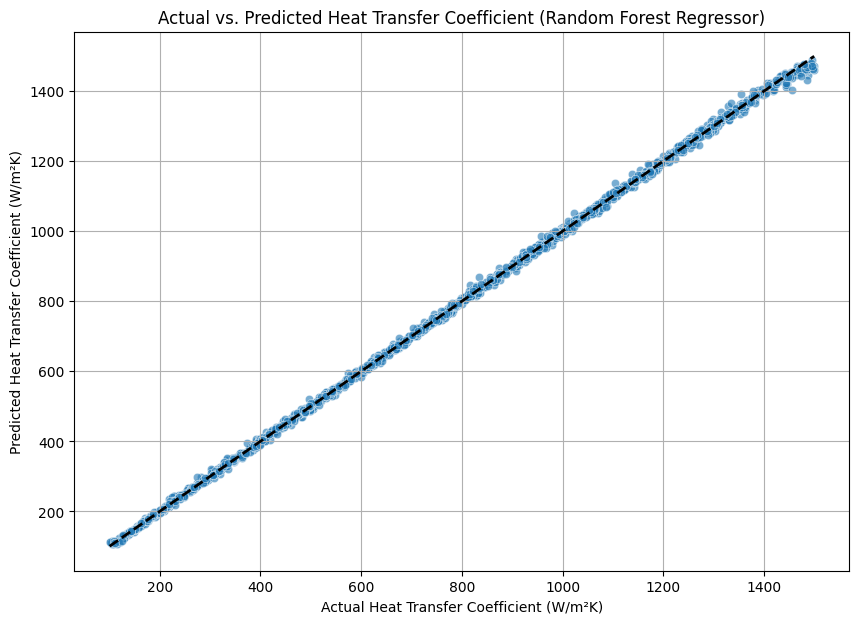

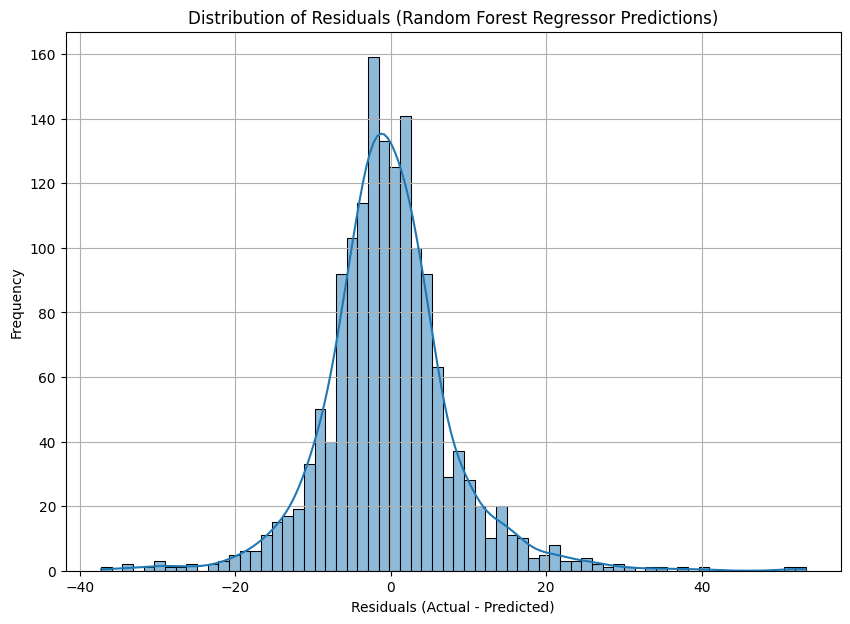

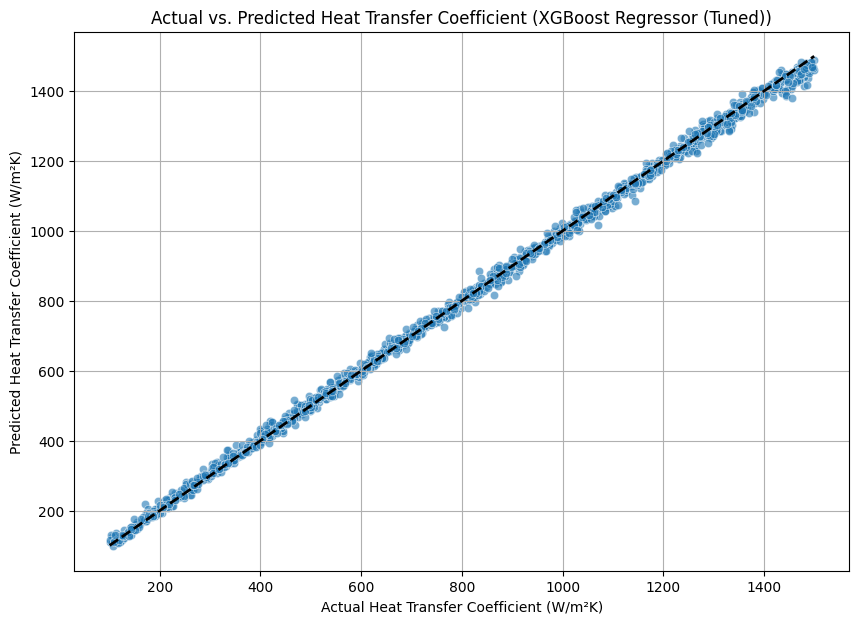

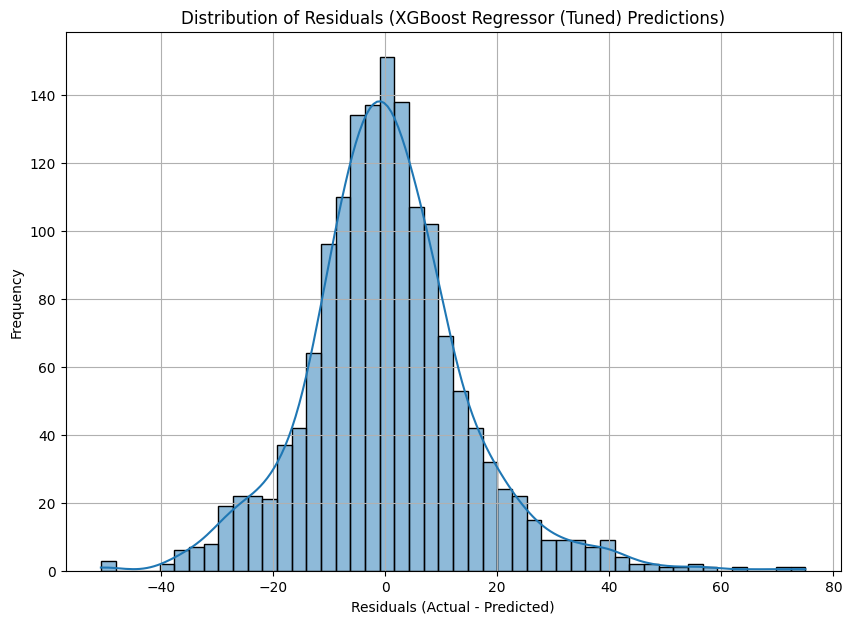

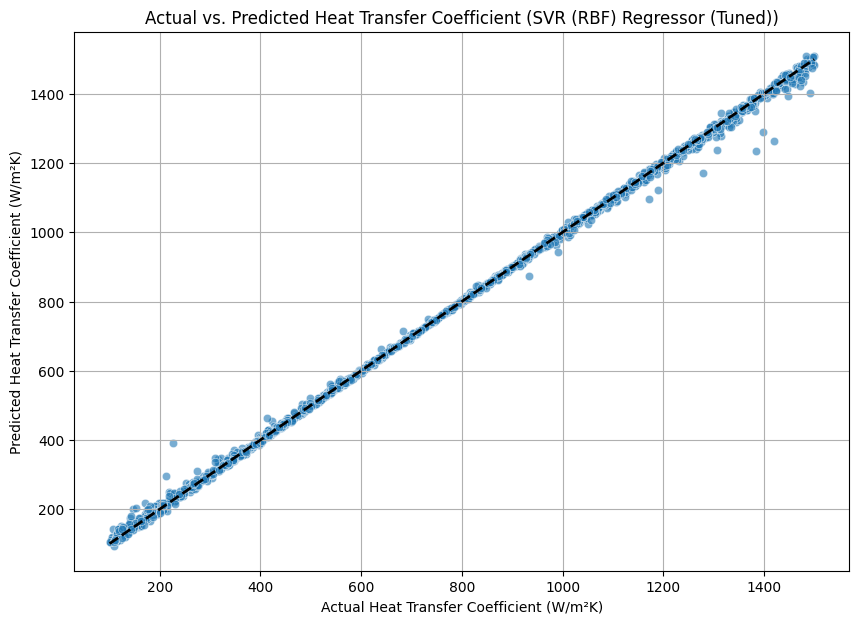

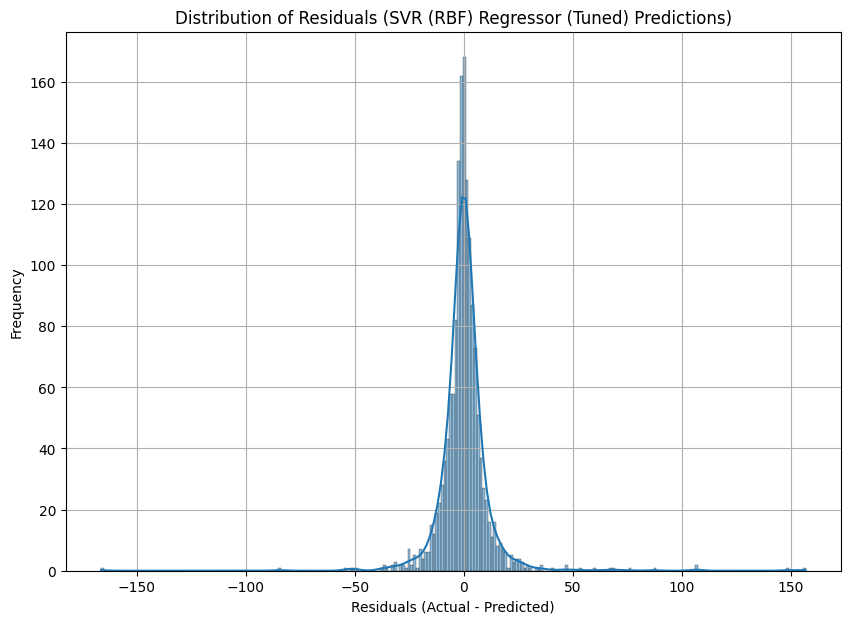

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

models_to_plot = [
    {'name': 'Random Forest Regressor', 'model': rf_model_new},
    {'name': 'XGBoost Regressor (Tuned)', 'model': best_xgb_model},
    {'name': 'SVR (RBF) Regressor (Tuned)', 'model': best_svr_model}
]

for model_info in models_to_plot:
    model_name = model_info['name']
    model = model_info['model']

    y_pred_current_model = model.predict(X_test_new)

    # --- 1. Predictions vs. Actuals Plot ---
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=y_test_new, y=y_pred_current_model, alpha=0.6)
    plt.plot([y_test_new.min(), y_test_new.max()], [y_test_new.min(), y_test_new.max()], 'k--', lw=2)
    plt.xlabel('Actual Heat Transfer Coefficient (W/m²K)')
    plt.ylabel('Predicted Heat Transfer Coefficient (W/m²K)')
    plt.title(f'Actual vs. Predicted Heat Transfer Coefficient ({model_name})')
    plt.grid(True)
    plt.show()

    # --- 2. Residuals Histogram ---
    residuals = y_test_new - y_pred_current_model

    plt.figure(figsize=(10, 7))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Residuals ({model_name} Predictions)')
    plt.grid(True)
    plt.show()


##Metric Comparison bar chart

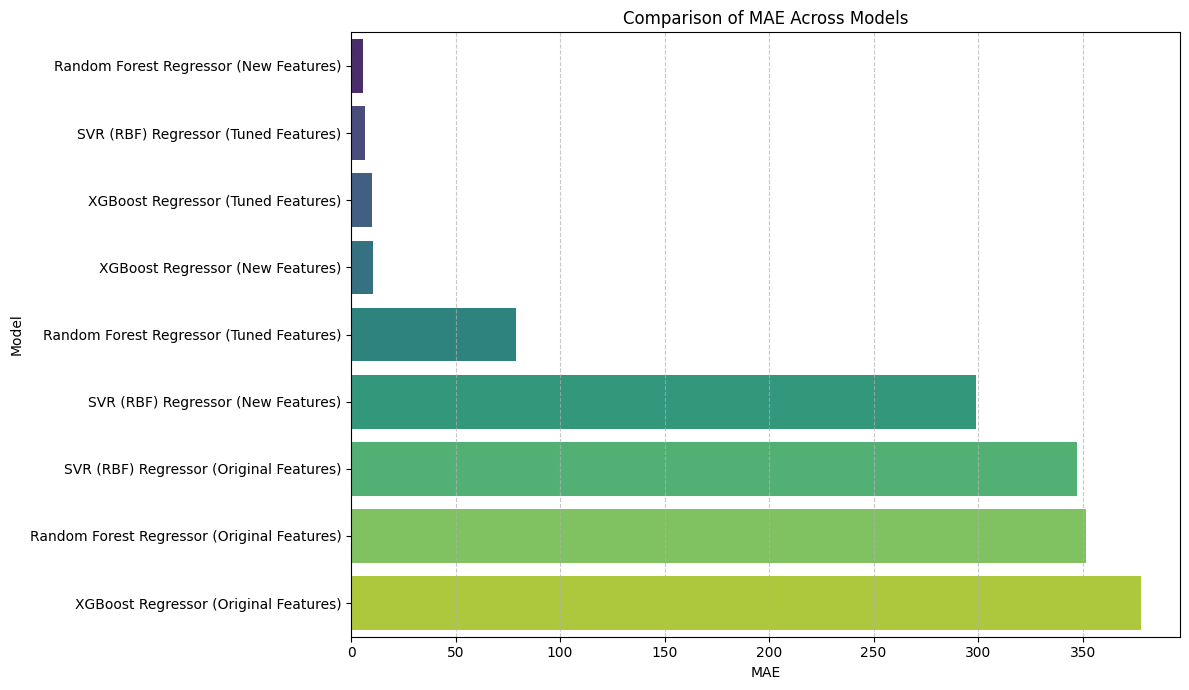

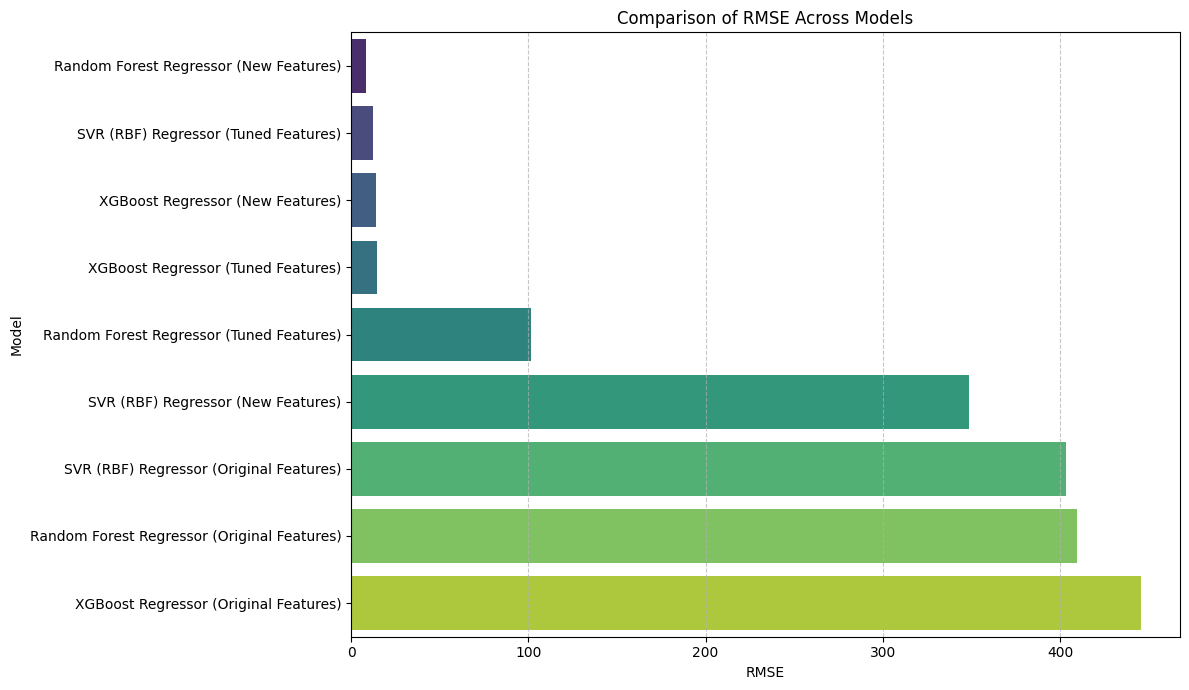

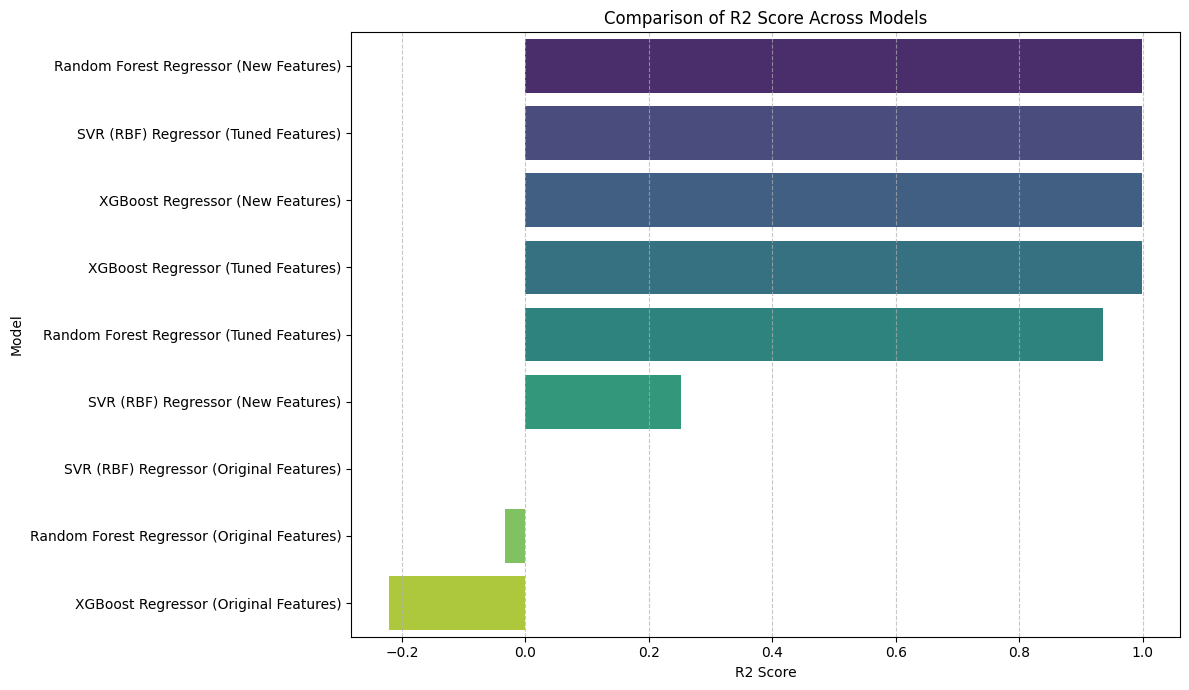

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


melted_df = performance_comparison_df.melt(id_vars=['Model'], var_name='Metric', value_name='Score')

metrics = ['MAE', 'RMSE', 'R2 Score']

for metric in metrics:
    plt.figure(figsize=(12, 7))
    subset = melted_df[melted_df['Metric'] == metric]
    sns.barplot(x='Score', y='Model', hue='Model', data=subset.sort_values(by='Score', ascending=(metric != 'R2 Score')),
                palette='viridis', legend=False)
    plt.title(f'Comparison of {metric} Across Models')
    plt.xlabel(metric)
    plt.ylabel('Model')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


##Feature Importance plot

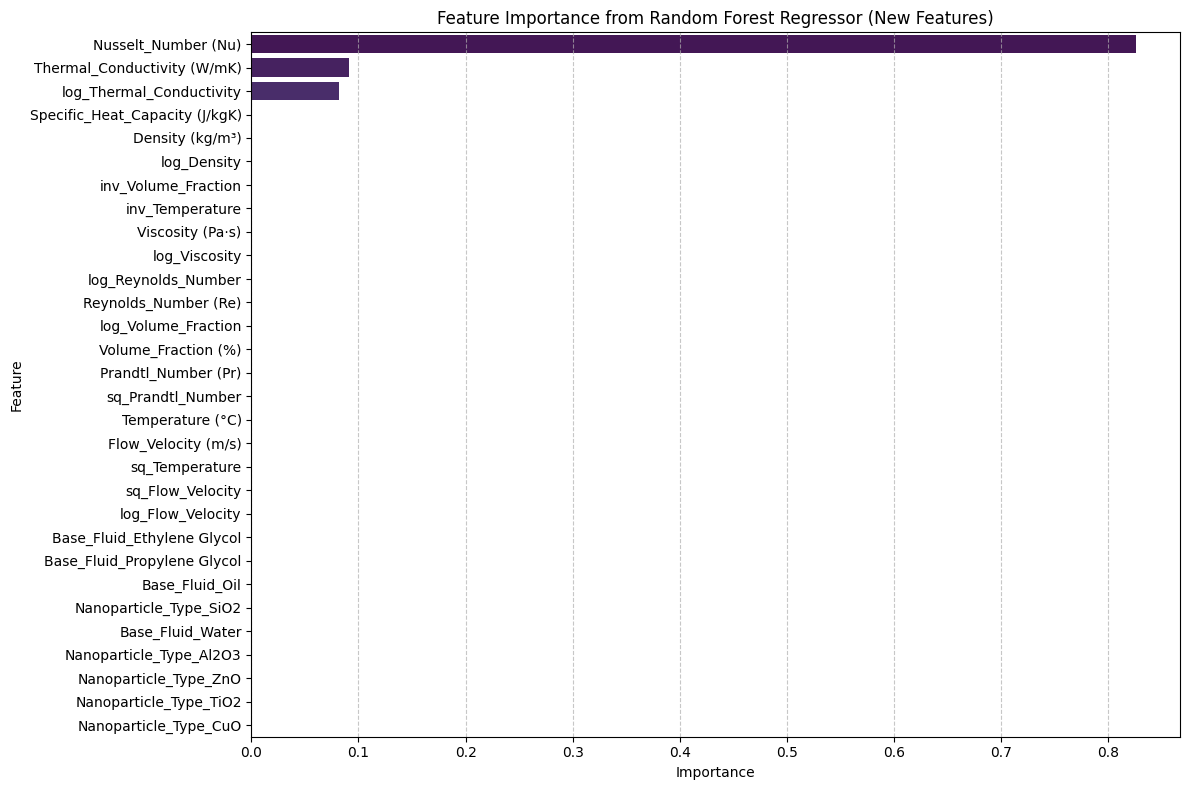

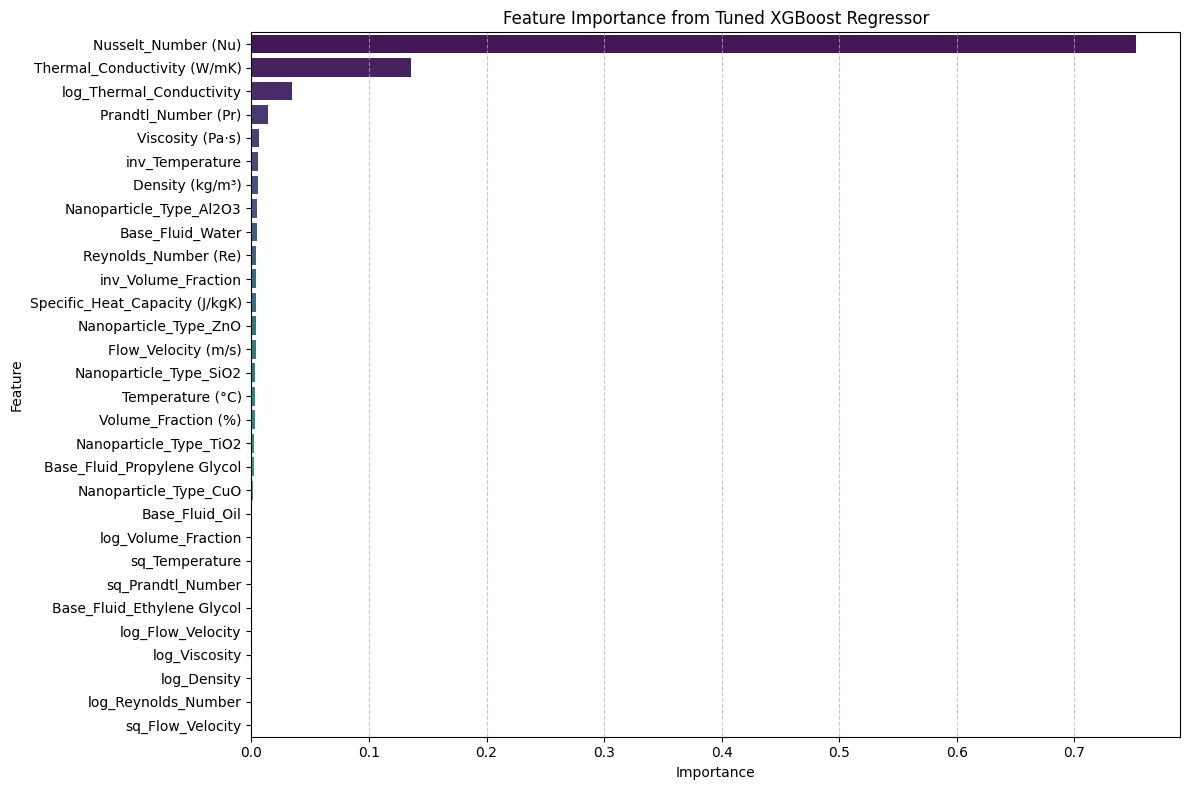

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# --- Random Forest Regressor Feature Importance ---
if 'rf_model_new' in locals() and 'X_train_new' in locals():
    feature_importances_rf = rf_model_new.feature_importances_
    features = X_train_new.columns

    importance_df_rf = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importances_rf
    })

    importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', hue='Feature', data=importance_df_rf, palette='viridis', legend=False)
    plt.title('Feature Importance from Random Forest Regressor (New Features)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Error: rf_model_new or X_train_new not found for Random Forest. Please ensure all preceding cells have been executed.")

# --- XGBoost Regressor Feature Importance ---
if 'best_xgb_model' in locals() and 'X_train_new' in locals():
    feature_importances_xgb = best_xgb_model.feature_importances_
    features_xgb = X_train_new.columns

    importance_df_xgb = pd.DataFrame({
        'Feature': features_xgb,
        'Importance': feature_importances_xgb
    })

    importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', hue='Feature', data=importance_df_xgb, palette='viridis', legend=False)
    plt.title('Feature Importance from Tuned XGBoost Regressor')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Error: best_xgb_model or X_train_new not found for XGBoost. Please ensure all preceding cells have been executed.")
